# Evaluate all embeddings generated with parameter_search

In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import datetime
import pickle

In [2]:
from evaluation_functions import nn, sil

In [3]:
wd = os.getcwd()

DF = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "processed", "df_focal_reduced.pkl")
OUT_COORDS = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "interim", "parameter_search", "umap_coords")
OUT_EVALS = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "interim", "parameter_search", "umap_evals")

In [4]:
spec_df = pd.read_pickle(DF)
print(spec_df.shape)
labels = spec_df.call_lable.values
labeltypes = sorted(list(set(labels)))

(6430, 28)


In [209]:
all_embedding_files = list(sorted(os.listdir(OUT_COORDS)))

In [210]:
params = ['preprocess_type', 'metric_type', 'duration_method','min_dist', 'spread', 'n_neighbors', 'n_comps', 'input_type', 'denoised', 'n_mels', 'f_unit', 'n_repeat']

In [211]:
eval_colnames = params+ ['S_total'] + ['S_'+x for x in labeltypes] + ['Snorm_total'] + ['Snorm_'+x for x in labeltypes] + ['SIL_total'] + ['SIL_'+x for x in labeltypes]+['knncc_'+x for x in labeltypes]
print(eval_colnames)

eval_table = np.zeros((len(all_embedding_files), len(eval_colnames)))
eval_table = pd.DataFrame(eval_table, columns=eval_colnames)

['preprocess_type', 'metric_type', 'duration_method', 'min_dist', 'spread', 'n_neighbors', 'n_comps', 'input_type', 'denoised', 'n_mels', 'f_unit', 'n_repeat', 'S_total', 'S_agg', 'S_al', 'S_cc', 'S_ld', 'S_mo', 'S_sn', 'S_soc', 'Snorm_total', 'Snorm_agg', 'Snorm_al', 'Snorm_cc', 'Snorm_ld', 'Snorm_mo', 'Snorm_sn', 'Snorm_soc', 'SIL_total', 'SIL_agg', 'SIL_al', 'SIL_cc', 'SIL_ld', 'SIL_mo', 'SIL_sn', 'SIL_soc', 'knncc_agg', 'knncc_al', 'knncc_cc', 'knncc_ld', 'knncc_mo', 'knncc_sn', 'knncc_soc']


In [212]:
k=5

for i,embedding_file in enumerate(all_embedding_files):
    embedding = np.loadtxt(os.path.join(os.path.sep, OUT_COORDS, embedding_file),delimiter=";")
    
    embedding_params_string = embedding_file.replace('.csv', '')
    embedding_params_list = embedding_params_string.split('_')
    
    nn_stats = nn(embedding, labels, k=k)
    sil_stats = sil(embedding, labels)

    eval_vector = embedding_params_list + [nn_stats.get_S()] + list(nn_stats.get_ownclass_S()) + [nn_stats.get_Snorm()] + list(nn_stats.get_ownclass_Snorm()) + [sil_stats.get_avrg_score()] + list(sil_stats.get_score_per_class()) + list(nn_stats.knn_cc())
    eval_table.loc[i,:] = eval_vector

In [213]:
eval_table

,preprocess_type,metric_type,duration_method,min_dist,spread,n_neighbors,n_comps,input_type,denoised,n_mels,...,SIL_mo,SIL_sn,SIL_soc,knncc_agg,knncc_al,knncc_cc,knncc_ld,knncc_mo,knncc_sn,knncc_soc
0,no,manhattan,pad,0,1,15,5,melspecs,no,40,...,-0.168935,0.397296,-0.417417,3.733333,35.603715,20.717671,0.000000,14.492754,78.760108,21.750433
1,no,manhattan,pad,0,1,15,5,melspecs,no,40,...,-0.169056,0.381388,-0.411578,3.733333,36.842105,19.228165,0.000000,14.756258,78.544474,23.310225
2,no,manhattan,pad,0,1,15,5,melspecs,no,40,...,-0.170348,0.384970,-0.415437,2.400000,35.758514,21.056195,0.000000,12.779974,78.652291,22.876950
3,no,manhattan,pad,0,1,15,5,melspecs,no,40,...,-0.174310,0.392201,-0.417528,4.800000,35.758514,21.530129,0.000000,15.019763,78.921833,22.010399
4,no,manhattan,pad,0,1,15,5,melspecs,no,40,...,-0.168255,0.382745,-0.410883,6.933333,34.984520,21.259309,0.000000,13.833992,78.598383,22.010399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,zs,manhattan,timeshift-pad,0,1,15,5,melspecs,no,40,...,0.308355,0.556464,-0.045367,11.466667,56.037152,56.668923,3.048780,39.789196,83.773585,37.521664
171,zs,manhattan,timeshift-pad,0,1,15,5,melspecs,no,40,...,0.314196,0.534360,-0.052162,9.866667,57.739938,55.856466,3.658537,39.130435,85.336927,38.388215
172,zs,manhattan,timeshift-pad,0,1,15,5,melspecs,no,40,...,0.298013,0.537106,-0.049484,4.800000,55.572755,56.194990,4.268293,37.417655,83.557951,39.514731
173,zs,manhattan,timeshift-pad,0,1,15,5,melspecs,no,40,...,-0.099196,0.156060,-0.106159,6.933333,48.452012,45.633040,4.268293,34.387352,82.048518,34.055459


In [214]:
eval_table['knncc_total'] = eval_table[['knncc_'+x for x in labeltypes]].mean(axis=1)

In [215]:
eval_table["min_dist"] = pd.to_numeric(eval_table["min_dist"])
eval_table["n_neighbors"] = pd.to_numeric(eval_table["n_neighbors"])
eval_table["spread"] = pd.to_numeric(eval_table["spread"])
eval_table["n_comps"] = pd.to_numeric(eval_table["n_comps"])
eval_table["n_mels"] = pd.to_numeric(eval_table["n_mels"])
eval_table["n_repeat"] = pd.to_numeric(eval_table["n_repeat"])

In [18]:
outname = os.path.join(os.path.sep, OUT_EVALS, 'eval_table_'+str(k)+'.csv')
eval_table.to_csv(outname, sep=";",  index=False)

## Plot results

In [5]:
import matplotlib.pyplot as plt

FIGURES = os.path.join(os.path.sep, str(Path(wd).parents[0]), "reports", "figures", "parameter_search")

In [19]:
outname = os.path.join(os.path.sep, OUT_EVALS, 'eval_table_5.csv')
eval_table = pd.read_csv(outname, sep=";")

In [20]:
eval_table

,preprocess_type,metric_type,duration_method,min_dist,spread,n_neighbors,n_comps,input_type,denoised,n_mels,...,SIL_sn,SIL_soc,knncc_agg,knncc_al,knncc_cc,knncc_ld,knncc_mo,knncc_sn,knncc_soc,knncc_total
0,no,manhattan,pad,0.0,1.0,15,5,melspecs,no,40,...,0.397296,-0.417417,3.733333,35.603715,20.717671,0.000000,14.492754,78.760108,21.750433,25.008288
1,no,manhattan,pad,0.0,1.0,15,5,melspecs,no,40,...,0.381388,-0.411578,3.733333,36.842105,19.228165,0.000000,14.756258,78.544474,23.310225,25.202080
2,no,manhattan,pad,0.0,1.0,15,5,melspecs,no,40,...,0.384970,-0.415437,2.400000,35.758514,21.056195,0.000000,12.779974,78.652291,22.876950,24.789132
3,no,manhattan,pad,0.0,1.0,15,5,melspecs,no,40,...,0.392201,-0.417528,4.800000,35.758514,21.530129,0.000000,15.019763,78.921833,22.010399,25.434377
4,no,manhattan,pad,0.0,1.0,15,5,melspecs,no,40,...,0.382745,-0.410883,6.933333,34.984520,21.259309,0.000000,13.833992,78.598383,22.010399,25.374277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,zs,manhattan,timeshift-pad,0.0,1.0,15,5,melspecs,no,40,...,0.556464,-0.045367,11.466667,56.037152,56.668923,3.048780,39.789196,83.773585,37.521664,41.186567
171,zs,manhattan,timeshift-pad,0.0,1.0,15,5,melspecs,no,40,...,0.534360,-0.052162,9.866667,57.739938,55.856466,3.658537,39.130435,85.336927,38.388215,41.425312
172,zs,manhattan,timeshift-pad,0.0,1.0,15,5,melspecs,no,40,...,0.537106,-0.049484,4.800000,55.572755,56.194990,4.268293,37.417655,83.557951,39.514731,40.189482
173,zs,manhattan,timeshift-pad,0.0,1.0,15,5,melspecs,no,40,...,0.156060,-0.106159,6.933333,48.452012,45.633040,4.268293,34.387352,82.048518,34.055459,36.539715


In [7]:
calltypes = sorted(list(set(spec_df.call_lable)))

outvars = ["S_total"]
outvars = ['S_'+x for x in calltypes]
outvars

['S_agg', 'S_al', 'S_cc', 'S_ld', 'S_mo', 'S_sn', 'S_soc']

In [8]:
params = ['preprocess_type', 'metric_type', 'duration_method','min_dist', 'spread', 'n_neighbors', 'n_comps', 'input_type','denoised', 'n_mels', 'f_unit', 'n_repeat']
p_default = dict(zip(params[:-1], ['zs', 'manhattan', 'pad', 0.0, 1.0, 15, 5, 'melspecs', 'no', 40, 'dB']))

spread


(0.0, 67.0)

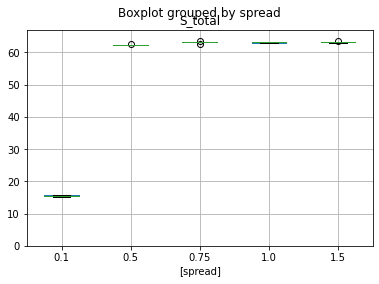

In [34]:
param = params[4]
print(param)
outvar="S_total"
other_params = set(params).difference([param, 'n_repeat'])

df = eval_table
for p in other_params:
#for p in ['preprocess_type', 'denoised', 'f_unit', 'min_dist', 'n_mels']:
    #print(p)
    #print(p_default[p])
    df = df.loc[df[p]==p_default[p],:]
    #print(df.shape)
#print(df.shape)
boxplot = df[[param]+[outvar]].boxplot(by=param)
plt.ylim(0,67)
#df = df[[param]+outvars]
#[param]+outvars

In [22]:
y_lower_dict = {"SIL":-0.65,
                "SIL_total": -0.05,
                "S":0,
                "S_total": 50,
                "knncc":0}
y_upper_dict = {"SIL":0.65,
                "SIL_total": 0.23,
                "S":100,
                "S_total": 67,
                "knncc":100}

In [252]:
# BOXPLOTS

for outvar in ['S_total', 'SIL_total']:
    for param in params[:-1]:
        other_params = set(params).difference([param, 'n_repeat'])

        df = eval_table
        for p in other_params:
            df = df.loc[df[p]==p_default[p],:]
        boxplot = df[[param]+[outvar]].boxplot(by=param)

        plt.ylim(y_lower_dict[outvar], y_upper_dict[outvar])
        plt.suptitle('')
        plt.title('')
        plt.xlabel(param)
        

        
        
        plt.savefig(os.path.join(os.path.sep, FIGURES,outvar+'_'+param+'_.jpg'))
        plt.close()

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [254]:
# LINE PLOTS

for out_v in ["SIL", "S", "knncc"]:
    outvars = [out_v+'_'+x for x in calltypes]

    for param in params[:-1]:
        other_params = set(params).difference([param, 'n_repeat'])

        df = eval_table
        for p in other_params:
            df = df.loc[df[p]==p_default[p],:]
        #print(df.shape)
        means = df[[param, out_v+'_total']]
        df = df[[param]+outvars]

        melted = pd.melt(df, id_vars=param, value_vars=outvars)
        melted = melted.sort_values(by=param)

        sns.lineplot(x=param, y="value", hue="variable", data=melted, palette="Set2", hue_order=outvars, err_style='band')
        sns.lineplot(x=param, y=out_v+'_total', data=means, color='black')
        plt.ylabel(out_v)
        plt.ylim(y_lower_dict[out_v], y_upper_dict[out_v])
        plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
        plt.savefig(os.path.join(os.path.sep, FIGURES,out_v+'_'+param+'_.jpg'))
        plt.close()

In [21]:
calltypes = sorted(list(set(spec_df.call_lable)))
outvars = ['SIL_'+x for x in calltypes]
outvars

['SIL_agg', 'SIL_al', 'SIL_cc', 'SIL_ld', 'SIL_mo', 'SIL_sn', 'SIL_soc']

In [257]:
param = params[0]
other_params = set(params).difference([param, 'n_repeat'])

df = eval_table
for p in other_params:
    df = df.loc[df[p]==p_default[p],:]
print(df.shape)
#boxplot = df[[param]+[outvars]].boxplot(by=param)
df = df[[param]+outvars]

levels = sorted(list(set(df[param])))
mean_df = df.groupby([param]).mean()
std_df = df.groupby([param]).std()
#outvar = outvars[0]
#df[outvar].values

(25, 44)


In [25]:
pal = sns.color_palette("Set2", n_colors=len(outvars))

In [28]:
for out_v in ["SIL", "S", "knncc"]:
    outvars = [out_v+'_'+x for x in calltypes]
    color_dict = dict(zip(outvars, pal))

    for param in params[:-1]:
        other_params = set(params).difference([param, 'n_repeat'])

        df = eval_table
        for p in other_params:
            df = df.loc[df[p]==p_default[p],:]
        #print(df.shape)
        means = df[[param, out_v+'_total']]
        df = df[[param]+outvars]
        
        levels = sorted(list(set(df[param])))
        mean_df = df.groupby([param]).mean()
        std_df = df.groupby([param]).std()

        fig, ax = plt.subplots(figsize=(7, 4))

        for outvar in outvars:
            y = mean_df[outvar].values
            yerr = std_df[outvar].values
            ax.errorbar(levels, y, yerr=yerr,color=color_dict[outvar]) # linestype=ls

        ax.set_ylim(y_lower_dict[out_v], y_upper_dict[out_v])
        ax.set_title(param)
        plt.savefig(os.path.join(os.path.sep, FIGURES,out_v+'_'+param+'_err.jpg'))
        plt.close()

In [ ]:
#df = df.groupby([param]).mean()

# Plot all

In [10]:
from plot_functions import mara_3Dplot, plotly_viz

In [11]:
eval_table

,Unnamed: 0,preprocess_type,metric_type,duration_method,min_dist,spread,n_neighbors,n_comps,input_type,denoised,...,SIL_sn,SIL_soc,knncc_agg,knncc_al,knncc_cc,knncc_ld,knncc_mo,knncc_sn,knncc_soc,knncc_total
0,0,no,manhattan,pad,0.0,1.0,15,5,melspecs,no,...,0.397296,-0.417417,3.733333,35.603715,20.717671,0.000000,14.492754,78.760108,21.750433,25.008288
1,1,no,manhattan,pad,0.0,1.0,15,5,melspecs,no,...,0.381388,-0.411578,3.733333,36.842105,19.228165,0.000000,14.756258,78.544474,23.310225,25.202080
2,2,no,manhattan,pad,0.0,1.0,15,5,melspecs,no,...,0.384970,-0.415437,2.400000,35.758514,21.056195,0.000000,12.779974,78.652291,22.876950,24.789132
3,3,no,manhattan,pad,0.0,1.0,15,5,melspecs,no,...,0.392201,-0.417528,4.800000,35.758514,21.530129,0.000000,15.019763,78.921833,22.010399,25.434377
4,4,no,manhattan,pad,0.0,1.0,15,5,melspecs,no,...,0.382745,-0.410883,6.933333,34.984520,21.259309,0.000000,13.833992,78.598383,22.010399,25.374277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,170,zs,manhattan,timeshift-pad,0.0,1.0,15,5,melspecs,no,...,0.556464,-0.045367,11.466667,56.037152,56.668923,3.048780,39.789196,83.773585,37.521664,41.186567
171,171,zs,manhattan,timeshift-pad,0.0,1.0,15,5,melspecs,no,...,0.534360,-0.052162,9.866667,57.739938,55.856466,3.658537,39.130435,85.336927,38.388215,41.425312
172,172,zs,manhattan,timeshift-pad,0.0,1.0,15,5,melspecs,no,...,0.537106,-0.049484,4.800000,55.572755,56.194990,4.268293,37.417655,83.557951,39.514731,40.189482
173,173,zs,manhattan,timeshift-pad,0.0,1.0,15,5,melspecs,no,...,0.156060,-0.106159,6.933333,48.452012,45.633040,4.268293,34.387352,82.048518,34.055459,36.539715


In [11]:
eval_table.loc[eval_table.input_type=='mfccs',:]

,Unnamed: 0,preprocess_type,metric_type,duration_method,min_dist,spread,n_neighbors,n_comps,input_type,n_repeat,...,SIL_sn,SIL_soc,knncc_agg,knncc_al,knncc_cc,knncc_ld,knncc_mo,knncc_sn,knncc_soc,knncc_total
65,65,zs,manhattan,pad,0,1,15,5,mfccs,0,...,0.544348,-0.450864,6.133333,40.866873,30.264049,0.0,20.553360,83.557951,28.162912,29.934068
66,66,zs,manhattan,pad,0,1,15,5,mfccs,1,...,0.548567,-0.451695,9.333333,40.712074,32.362898,0.0,21.739130,83.396226,27.556326,30.728570
67,67,zs,manhattan,pad,0,1,15,5,mfccs,2,...,0.543754,-0.446180,12.000000,39.009288,32.836831,0.0,19.367589,83.234501,27.902946,30.621594
68,68,zs,manhattan,pad,0,1,15,5,mfccs,3,...,0.545092,-0.451622,10.133333,40.402477,33.446175,0.0,22.793149,83.288410,28.249567,31.187587
69,69,zs,manhattan,pad,0,1,15,5,mfccs,4,...,0.544664,-0.449811,9.333333,42.260062,29.451591,0.0,21.080369,83.180593,27.123050,30.347000


In [21]:
embedding_file = 'zs_manhattan_pad_0_1_15_5_mfccs_2.csv'
embedding = np.loadtxt(os.path.join(os.path.sep, OUT_COORDS, embedding_file),delimiter=";")

In [22]:
labels = spec_df.call_lable.values
pal="Set2"

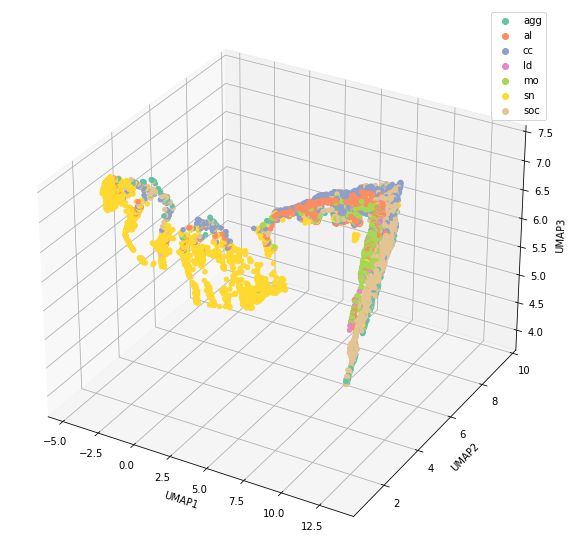

In [23]:
mara_3Dplot(embedding[:,0],
            embedding[:,1],
            embedding[:,2],
            labels,
            pal,
            None)